<a href="https://colab.research.google.com/github/vermaraj455164/Practice-demo/blob/main/Copy_of_Data_Wrangling_Code_Optimisation_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎉 Hi there! Welcome to today's assignment on Data Wrangling - Code Optimisation in Python!

Are you ready to put your skills to the test? Let's dive right in! 💪📚

In this assignment, you will be working with NumPy Vectorization, Dask Parallelization and Caching with Joblib in Python. Don't worry if you're feeling a bit unsure - you got this! 🤞

Good luck! 🍀🚀

## **Activity 1:**

### **Square Array Elements:**

You are given a list of numbers. You need to create a new list such that each element in the new list is the square of the corresponding element in the original list, but only for the elements that are greater than or equal to 5.

For example, if the original list is `[2, 4, 6, 8, 10]`, the new list would be `[2, 4, 36, 64, 100]`.

Write a Python function that takes in the original list and returns the new list using numpy vectorization.

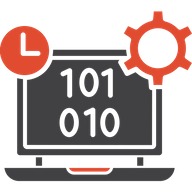

In [ ]:
# Write your code here
import numpy as np

def square_greater_than_or_equal_to_five(numbers):
    numbers = np.array(numbers)
    mask = numbers >= 5
    new_numbers = np.where(mask, numbers**2, numbers)
    return new_numbers.tolist()


In [ ]:
Origina_List= [2, 4, 6, 8, 10]
new_list = square_greater_than_or_equal_to_five(Origina_List)
print(new_list)


[2, 4, 36, 64, 100]


👉 **Instructions:**

1. Convert the given list to a numpy array using the numpy.array() function.
2. Create a boolean mask for the array using the condition that elements should be greater than or equal to 5.
3. Use the boolean mask to select the elements that satisfy the condition.
4. Square the selected elements using the numpy.power() or the ** operator.
5. Return the modified list.

## **Activity 2:**

### **Employee Pay:**

Suppose you have a list of integers representing the number of hours worked by different employees on a particular day. You need to calculate the total pay for each employee based on their hourly wage and the number of hours worked. However, the hourly wage may be different for each employee. Using Dask parallelization, write a program to calculate the total pay for each employee and store the results in a new list.

Assume that the input list of hours worked and the list of hourly wages for each employee are both of the same length and that the wage for employee i is at index i in the list of wages.

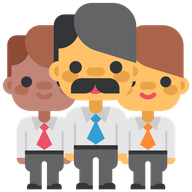

In [ ]:
# Write your code here
import dask
import dask.bag as db

def calculate_pay(hours_worked, hourly_wages):
    return hours_worked * hourly_wages

def calculate_total_pay(hours_worked_list, hourly_wages_list):
    hours_worked_bag = db.from_sequence(hours_worked_list)
    hourly_wages_bag = db.from_sequence(hourly_wages_list)
    pay_bag = dask.bag.map(calculate_pay, hours_worked_bag, hourly_wages_bag)
    total_pay_list = dask.compute(pay_bag)[0]
    return total_pay_list

# Example usage
hours_worked_list = [15, 20, 25, 30]
hourly_wages_list = [8, 7, 9, 6]

total_pay_list = calculate_total_pay(hours_worked_list, hourly_wages_list)
print(total_pay_list)




[120, 140, 225, 180]


👉 **Instructions:**

1. Import the necessary library for Dask.
2. Define a function calculate_pay which takes two lists as input parameters.
3. Convert the input lists into a Dask bag using from_sequence method.
4. Apply the lambda function to each element of the Dask bag to calculate the total pay for each employee.
5. Compute the results using compute method.
6. Return the results from the function.

## **Activity 3:**

### **Keep in Memory:**

You have a numpy array of 1 million integers, and you want to find the sum of all the even numbers in the array. You also want to cache the results so that if the function is called again with the same input, the cached result is returned instead of recalculating the sum.

Write a Python function that takes the numpy array as input and uses caching with joblib to return the sum of all even numbers in the array.

You can assume that the numpy array is stored in a file called "array_data.npy" in the same directory as your Python script.

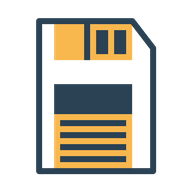

In [ ]:
# Write your code here
import numpy as np
from joblib import Memory
mem= Memory(location='cache')
@mem.cache
def add_arrays(x,y):
  import numpy as np
  x = np.array(x)
  y = np.array(y)
  print("calculatig sum...........")
  total = x+y
  return total

In [ ]:
# Define arrays
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Add the arrays using the add_arrays function
result = add_arrays(a, b)

# Print the result
print(result)

________________________________________________________________________________
[Memory] Calling __main__--content-<ipython-input-637ad161984b>.add_arrays...
add_arrays(array([1, 2, 3]), array([4, 5, 6]))
calculatig sum...........
_______________________________________________________add_arrays - 0.0s, 0.0min
[5 7 9]


👉 **Instructions:**

1. Import the necessary libraries and define the cache directory.
2. Create a Memory object with the cache directory.
3. Define the function to add two arrays and use the cache with the @memory.cache decorator.
4. Define the arrays and call a function to add them.
5. Return the results.